# Analysis of Suicide Rate India
## Suicides In India
* Suicide is considered as a disease and according to the report of WHO.
* About 800,000 people commit suicide worldwide every year, of these 135,000 are residents of India.
* 17 percent residents of the global suicide sufferers belong to India.
* Every hour, 1 student commits suicide in India.
* There are various causes of suicides like professional/career problems, sense of isolation, abuse, violence, family problems, mental disorders, addiction to alcohol, financial loss, chronic pain etc.

## Objective of This Project
* Suicide is Preventable.
* Most suicidal individuals wants to live but they are unable to see alternatives to their problems.
* The objective of the project is to find the causes of increasing suicide rate by analysis of the different factors.

## Project Stages
* Data Collection
* Data Cleaning
* Analysis And Visualization
* Findings

## Installing Required Libraries

In [1]:
!pip install numpy --quiet
!pip install pandas --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet

## Importing required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1: Data Collection
* The dataset we are using is taken from Kaggle. The data set contain necessary information like state, year, gender, age group, number of suicides
* This data set contains the details from 2001-2012.
* Click here to download- https://www.kaggle.com/code/pranavdhadnekar/eda-on-suicides-in-india

## Importing Dataset

In [5]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df.shape

(237519, 7)

## Stage 2 : Data Cleaning

In [6]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

### There are no NaN values

In [7]:
df.duplicated().sum()

0

### There are no Duplicate values in the dataset

In [8]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [9]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

### The Total (All India) Total (States) Total (Uts) are not needed.

In [10]:
df.drop(df[df['State']=='Total (States)'].index,inplace = True)

In [11]:
df.drop(df[df['State']=='Total (All India)'].index,inplace = True)

In [12]:
df.drop(df[df['State'] == 'Total (Uts)'].index, inplace = True)

In [13]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [14]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [15]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [16]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [17]:
df['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

### Need to remove column Causes Not known, Other Causes (Please Specity), By Other means (please specify) and change the name of Bankruptcy or Sudden change in Economic.

In [18]:
df.drop(df[df['Type'] == 'Other Causes (Please Specity)'].index, inplace = True)

In [19]:
df.drop(df[df['Type'] == 'Causes Not known'].index, inplace = True)

In [20]:
df.drop(df[df['Type'] == 'By Other means (please specify)'].index, inplace = True)

In [21]:
df['Type'] = df['Type'].replace(['Bankruptcy or Sudden change in Economic'],'Bankruptcy or Sudden change in Economic Status')

In [22]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

### we are going to make two DataFrames one contains 0-100 age group used to analysis total suicide countand another contains the without 0-100 age group to remove ambiguity in dataset while calculating age related analysis.

In [24]:
df_ab = df[df['Age_group'] != '0-100+']

## Stage 3: Analysis And Visualization of Data

Text(0.5, 1.0, 'Suicides state wise')

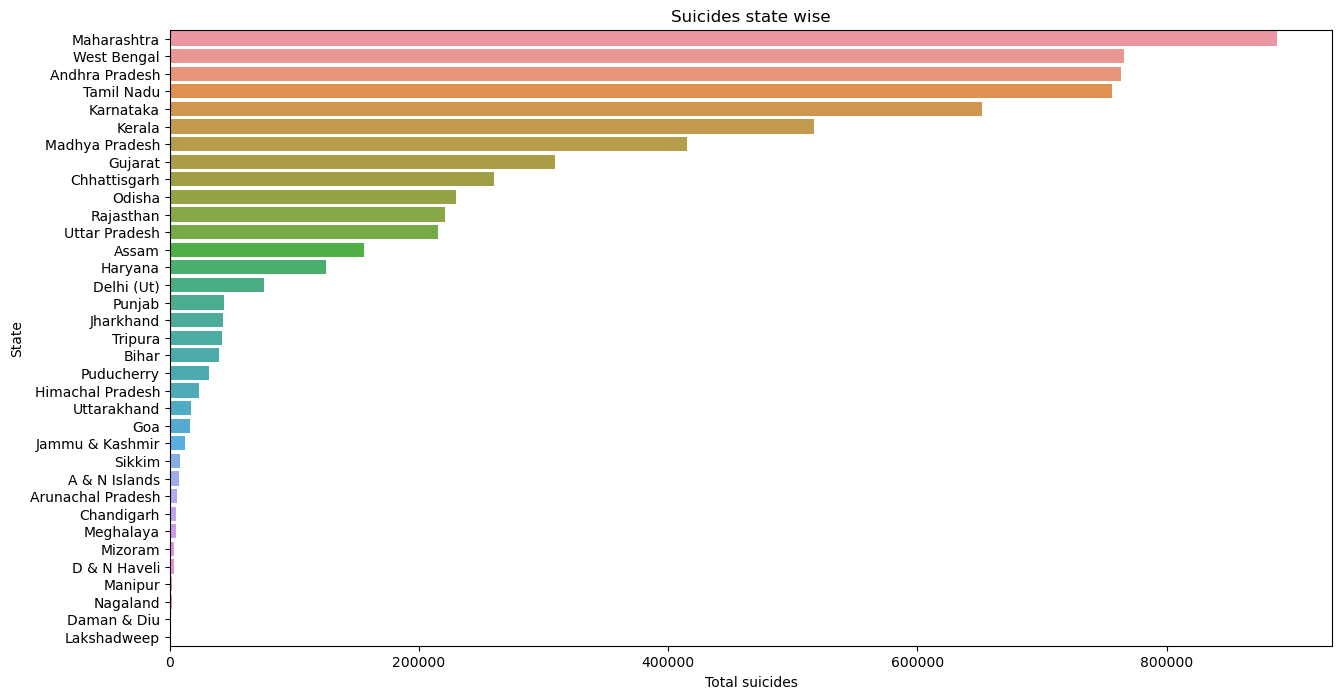

In [25]:
# Grouping data based on State counting the total suicides
df_st =df.groupby(by=['State']).sum().Total.sort_values(ascending = False)

# Bargraph for State and Total count
plt.figure(figsize=(15,8))
sns.barplot(x=df_st,y=df_st.index)
plt.xlabel('Total suicides')
plt.title('Suicides state wise')

### Maharashtra have the high number of suicide cases amoung all the states

Text(0.5, 1.0, 'Based on Age Group')

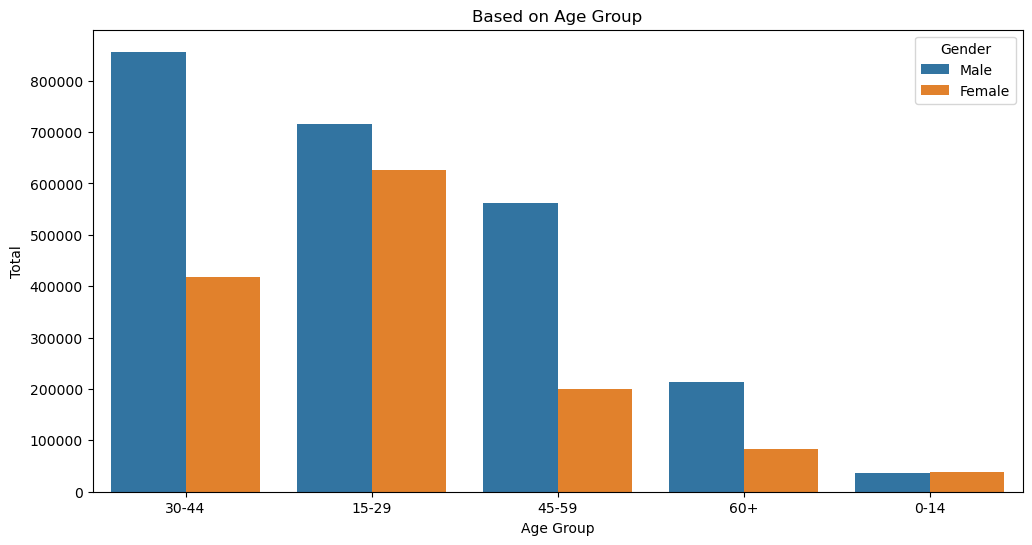

In [26]:
data = df_ab[['Age_group','Gender','Total']]

# Grouping Data Based on the Age_group and Gender and Count total Suicides
edSort = data.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

#BarGraph for Age_group, Gender and Total count
plt.figure(figsize=(12,6))
sns.barplot(x='Age_group',y='Total',hue='Gender',data=edSort)
plt.xlabel('Age Group')
plt.title('Based on Age Group')

### From the above graph Suicide amoung Male is high than Female

Text(0.5, 1.0, 'Age-wise suicide rate count')

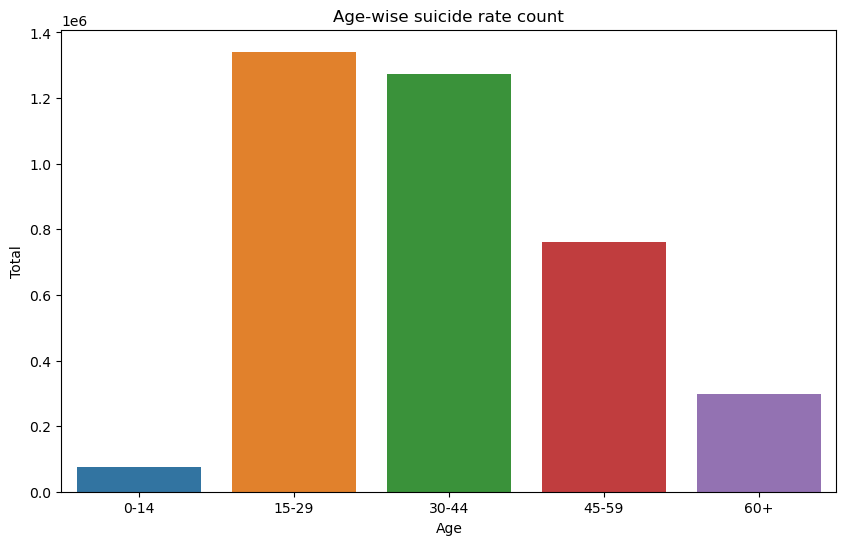

In [27]:
# Grouping Data Based on Age_group
df_age = df_ab.groupby(by = ['Age_group'])

# BarGraph
plt.figure(figsize=(10,6))
sns.barplot(x=df_age.sum().Total.index,y=df_age.sum().Total.values)
plt.xlabel('Age')
plt.ylabel('Total')
plt.title('Age-wise suicide rate count')

### The Age groups 15-29 and 30-44 have the high suicide rate

Text(0.5, 1.0, 'Year wise suicides ')

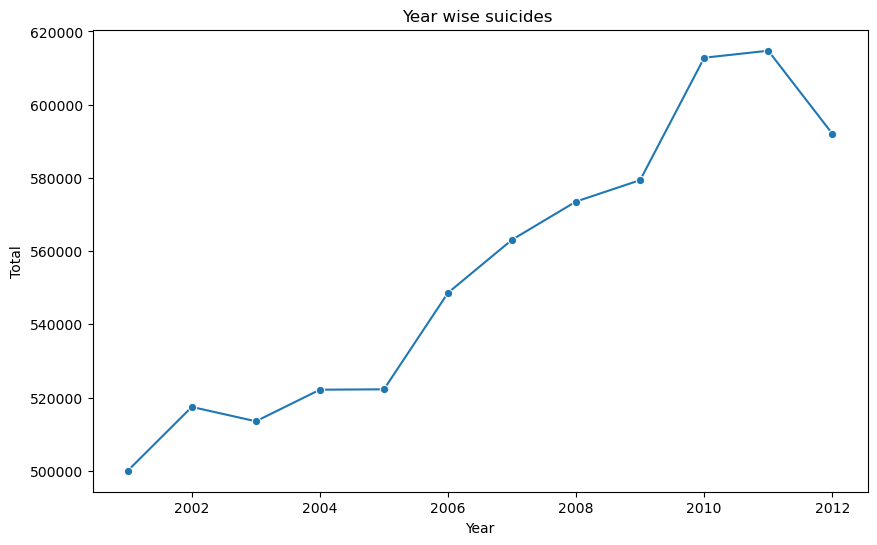

In [28]:
# Grouping Data Based on Year
df_year = df.groupby(by = ['Year'])

# Graph
plt.figure(figsize = (10,6))
sns.lineplot(x=df_year.sum().index, y = df_year.sum().Total.values,marker='o')
plt.ylabel('Total')
plt.title('Year wise suicides ')

### Analysis based on different type Codes

Text(0.5, 1.0, 'Social Status')

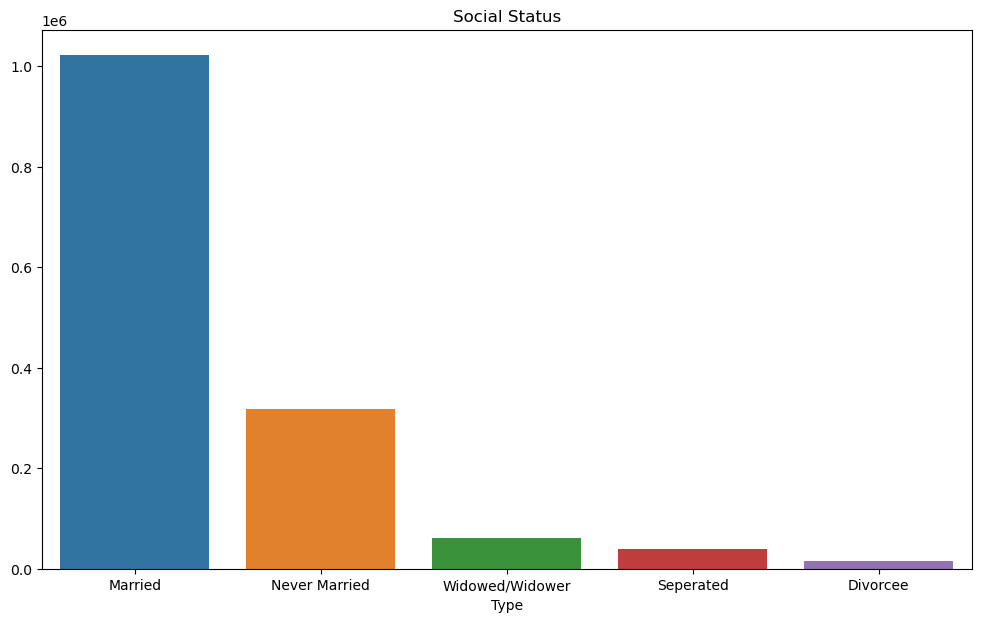

In [30]:
# Filter data by Social_Status
df_social_st = df[df['Type_code']=='Social_Status']

# Grouping Data based on Social Status
df_socgrp = df_social_st.groupby(by=['Type'])
df_sgtotal = df_socgrp.sum().Total.sort_values(ascending = False)

# Bargraph based on Social Status
plt.figure(figsize=(12,7))
sns.barplot(x=df_sgtotal.index, y=df_sgtotal.values)
plt.title('Social Status')

Text(0.5, 0, 'Total')

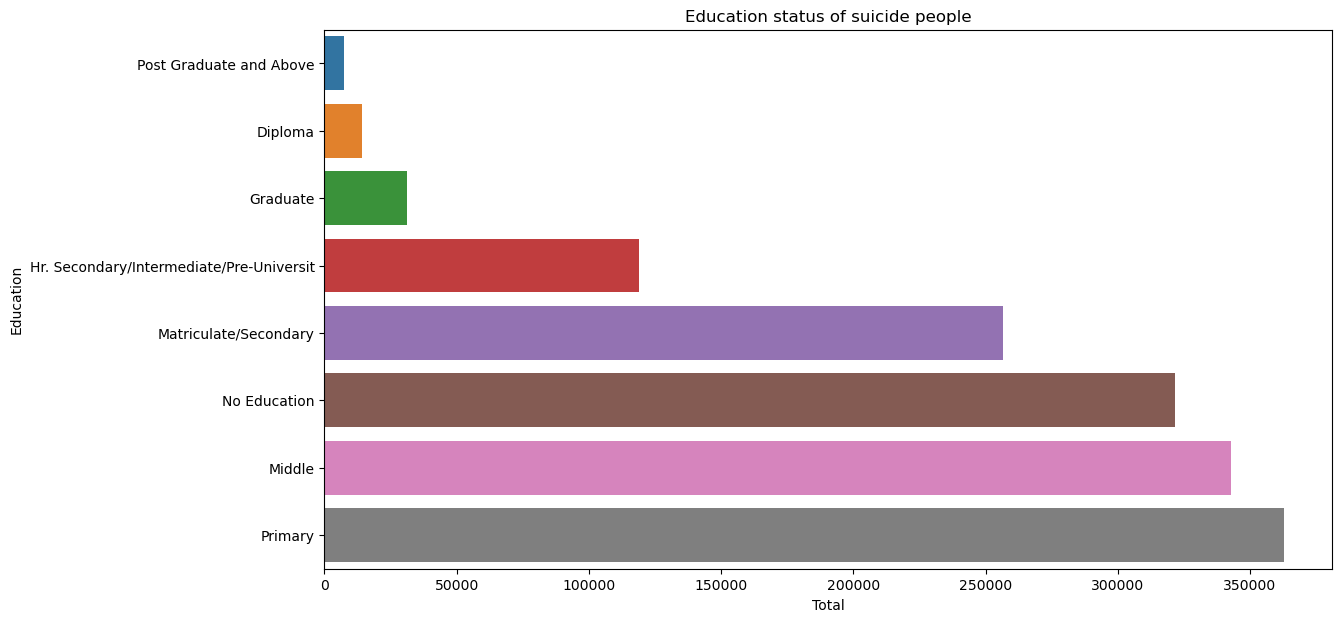

In [31]:
# Filter data based on type code
df_edu_st = df[df['Type_code']=='Education_Status']

# Grouping Data 
df_edugrp = df_edu_st.groupby(by = ['Type']).sum().Total.sort_values(ascending=True)

# Bargraph based on Education Status and total suicides
plt.figure(figsize=(13,7))
sns.barplot(y=df_edugrp.index,x=df_edugrp.values)
plt.ylabel('Education')
plt.title('Education status of suicide people')
plt.xlabel('Total')

In [32]:
# Filter the data based on type code
df_profile = df[df['Type_code']=='Professional_Profile']
df_profile= df_profile[df_profile['Type']!='Others (Please Specify)']

Text(0, 0.5, 'Profession')

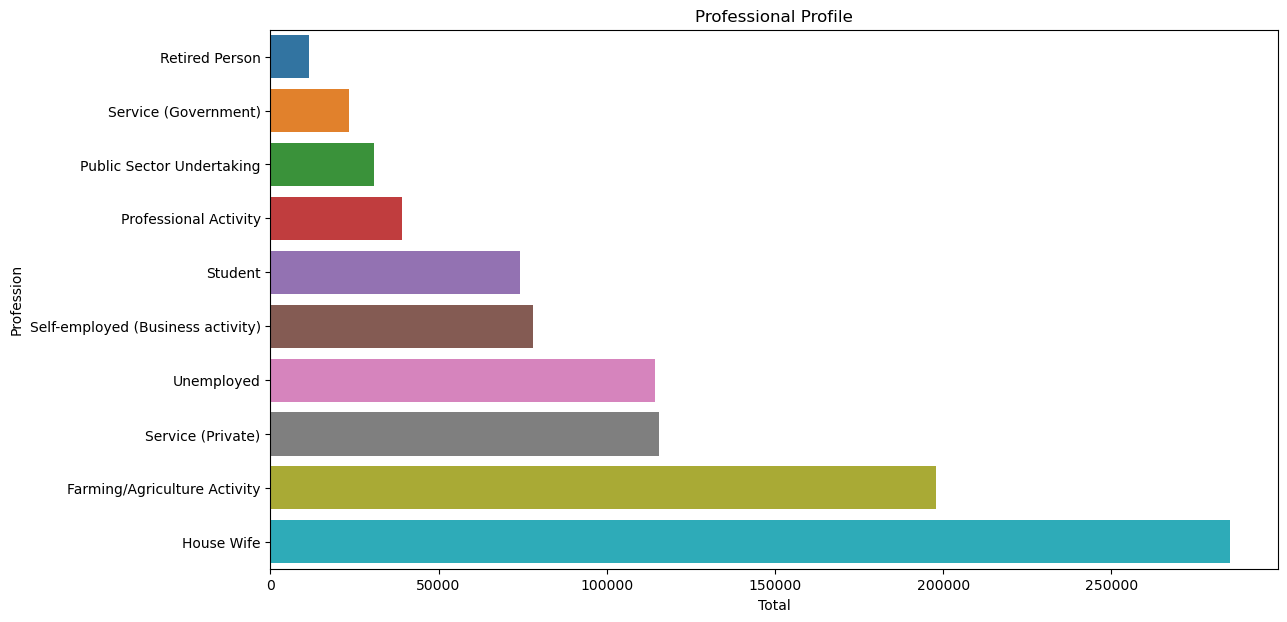

In [33]:
# Grouping Data of different professional profile
df_progrp = df_profile.groupby(by = ['Type']).sum().Total.sort_values(ascending=True)

# Bargraph for professional profile and total count
plt.figure(figsize=(13,7))
sns.barplot(y=df_progrp.index,x=df_progrp.values)
plt.title('Professional Profile')
plt.xlabel('Total')
plt.ylabel('Profession')

Text(0.5, 1.0, 'Causes')

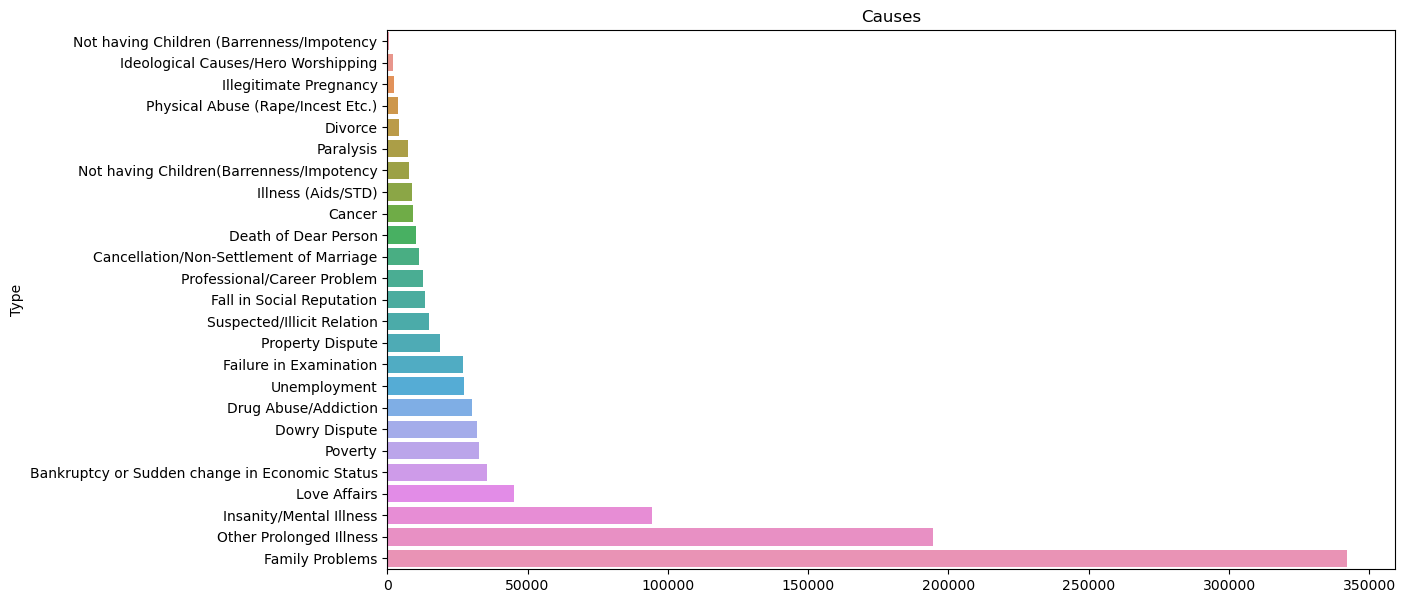

In [34]:
# Filter data based on causes
filtered = np.where((df['Type_code'] == 'Causes'))

# Group the data
df_casgrp = df.iloc[filtered].groupby(by = ['Type']).sum().Total.sort_values(ascending=True)

# graph for different causes and total count
plt.figure(figsize=(13,7))
sns.barplot(y=df_casgrp.index,x=df_casgrp.values)
plt.title('Causes')

### Based on Age Group

In [35]:
# filter Data based on age 60+
filtered= np.where(df['Age_group'] == '60+')
df_60 = df.iloc[filtered]

# removing unnecessary information
filtered = np.where(df_60['Type'] != 'Others (Please Specify)' )
df_60grp = df_60.groupby(by = ['Type']).sum().Total.sort_values(ascending=False)

Text(0.5, 0, ' 60+ group their profession and reasons')

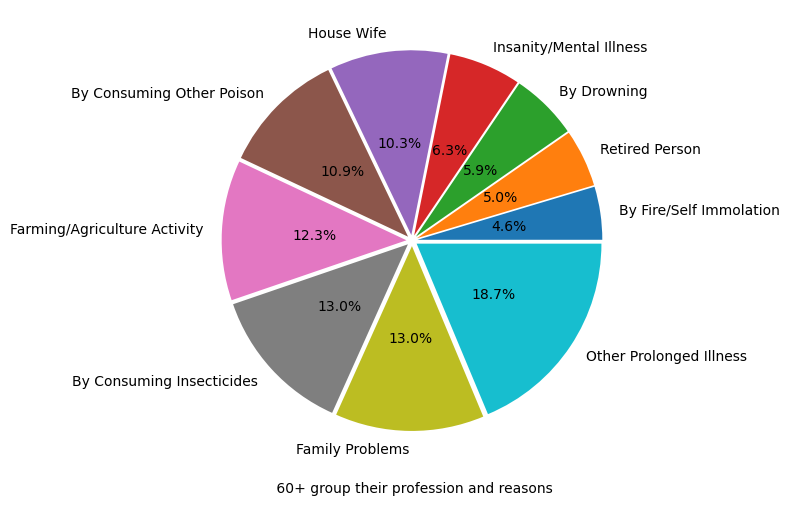

In [36]:
# pie chart of age group 60+ and their reasons
pie, ax = plt.subplots(figsize=[10,6])
data = df_60grp.values[11:1:-1]
keys = df_60grp.index[11:1:-1]
palette_color = sns.color_palette('dark')
plt.pie(x=data, autopct="%.1f%%", explode=[0.03]*10, labels=keys, pctdistance=0.5)
plt.xlabel(' 60+ group their profession and reasons')

In [37]:
# filter Data based on age 45-59
filtered = np.where(df['Age_group'] == '45-59')
df_45 = df.iloc[filtered]

# removing unnecessary information
filtered = np.where(df_45['Type'] != 'Others (Please Specify)')
df_45 = df_45.iloc[filtered]
df_45grp = df_45.groupby(by = ['Type']).sum().Total.sort_values(ascending=False)

Text(0.5, 0, '45-59 age group their profession and reasons')

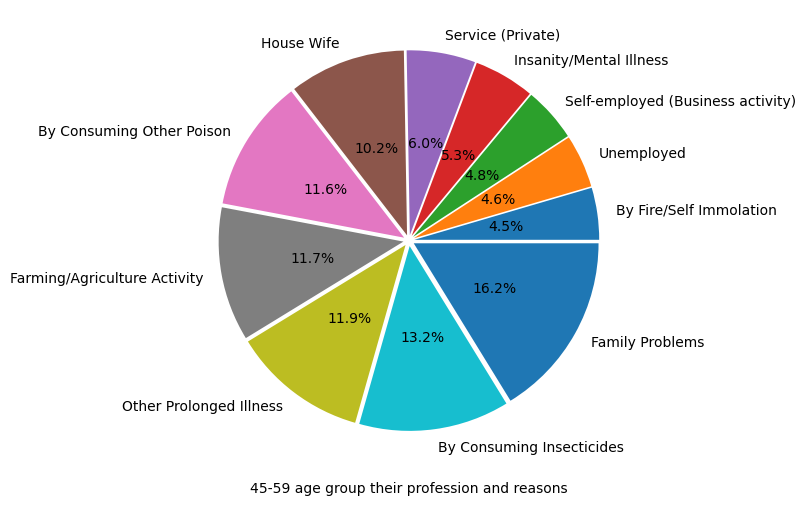

In [38]:
# pie chart of age group 45-59 and their reasons
pie, ax = plt.subplots(figsize=[10,6])
data = df_45grp.values[11:0:-1]
keys = df_45grp.index[11:0:-1]
palette_color = sns.color_palette('dark')
plt.pie(x=data, autopct="%.1f%%", explode=[0.03]*11, labels=keys, pctdistance=0.5)
plt.xlabel('45-59 age group their profession and reasons')

In [39]:
# filter Data based on age 30-44
filtered = np.where(df['Age_group'] == '30-44')
df_30 = df.iloc[filtered]

# removing unnecessary information
filtered = np.where(df_30['Type'] != 'Others (Please Specify)' )
df_30 = df_30.iloc[filtered]
df_30grp = df_30.groupby(by = ['Type']).sum().Total.sort_values(ascending=False)

Text(0.5, 0, '30 - 44 age group their profession and reasons')

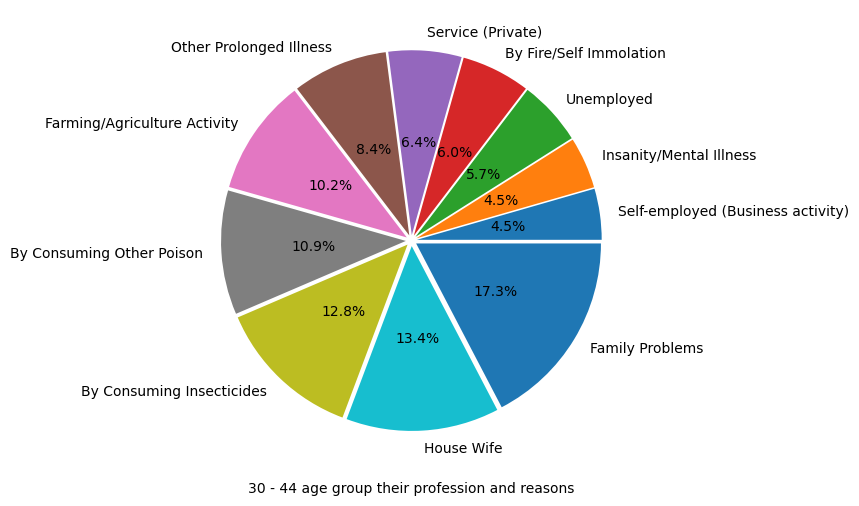

In [40]:
# pie chart of age group 30-44 and their reasons
pie, ax = plt.subplots(figsize=[10,6])
data = df_30grp.values[11:0:-1]
keys = df_30grp.index[11:0:-1]
palette_color = sns.color_palette('dark')
plt.pie(x=data, autopct="%.1f%%", explode=[0.03]*11, labels=keys, pctdistance=0.5)
plt.xlabel('30 - 44 age group their profession and reasons')

In [41]:
# filter Data based on age 15-29
filtered = np.where(df['Age_group'] == '15-29')
df_29 = df.iloc[filtered]

# removing unnecessary information
filtered = np.where(df_29['Type'] != 'Others (Please Specify)' )
df_29 = df_29.iloc[filtered]
df_29grp = df_29.groupby(by = ['Type']).sum().Total.sort_values(ascending=False)

Text(0.5, 0, '15-29 age group their profession and reasons')

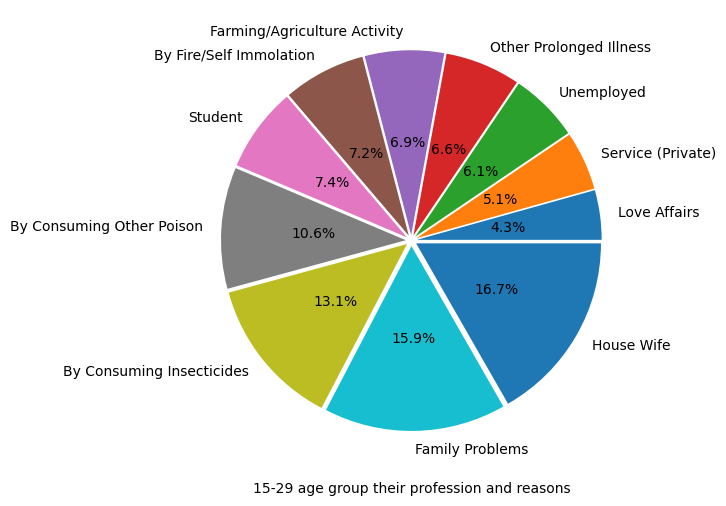

In [42]:
# pie chart of age group 15-29 and their reasons
pie, ax = plt.subplots(figsize=[10,6])
data = df_29grp.values[11:0:-1]
keys = df_29grp.index[11:0:-1]
palette_color = sns.color_palette('dark')
plt.pie(x=data, autopct="%.1f%%", explode=[0.03]*11, labels=keys, pctdistance=0.5)
plt.xlabel('15-29 age group their profession and reasons')

In [43]:
# filter Data based on age below 14
filtered = np.where(df['Age_group'] == '0-14')
df_14 = df.iloc[filtered]

# removing unnecessary information
filtered = np.where(df_14['Type'] != 'Others (Please Specify)')
df_14 = df_14.iloc[filtered]
df_14grp = df_14.groupby(by = ['Type']).sum().Total.sort_values(ascending=False)

Text(0.5, 0, 'Below 14 age group their profession and reasons')

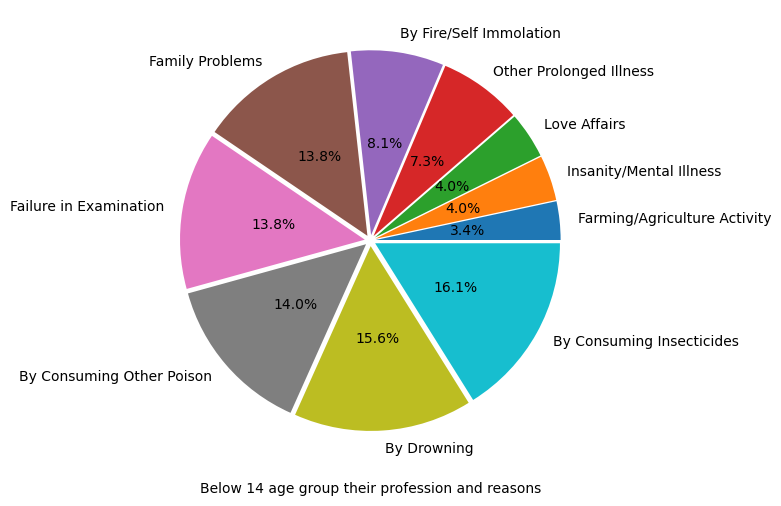

In [44]:
# pie chart of age group below 14 and their reasons
pie, ax = plt.subplots(figsize=[10,6])
data = df_14grp.values[11:1:-1]
keys = df_14grp.index[11:1:-1]
palette_color = sns.color_palette('dark')
plt.pie(x=data, autopct="%.1f%%", explode=[0.03]*10, labels=keys, pctdistance=0.5)
plt.xlabel('Below 14 age group their profession and reasons')

## Findings From The Analysis
* Maharashtra have the high suicide count.
* Suicide in male are more than female in every age group.
* Married committed more suicide.
* From professional profile, house wife commit more suicide.
* Agriculture sector have the high number of suicides in professional profile after house wife.
* From the Analysis, higher educational status have low suicide count.
* Family problems is the common and major causes for the high suicide count in different age groups.